In [1]:
import pandas as pnd #para manejar el dataframe
import numpy as np #para abrir el csv
import matplotlib.pyplot as plt #para graficar 
import sklearn as sk #para normalizar los datos
from sklearn.cluster import KMeans

In [2]:
path = 'C:/Users/JoseAntonio/Desktop/ENOE/closters/norm2016.csv'
X = pnd.read_csv(path, encoding='latin', low_memory=False)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000001,0.00001,0.044379,0.999015,0.000112,0.000017,0.000001,0.000001,0.0,0.000004,0.000129,0.000001,0.000051,0.000004,0.000002,0.000007,0.000008,0.000110,0.000001,0.000468
1,0.000001,0.00001,0.044379,0.999015,0.000112,0.000017,0.000001,0.000001,0.0,0.000004,0.000129,0.000002,0.000053,0.000004,0.000004,0.000007,0.000008,0.000004,0.000001,0.000468
2,0.000001,0.00001,0.044379,0.999015,0.000112,0.000017,0.000001,0.000001,0.0,0.000004,0.000129,0.000003,0.000026,0.000004,0.000002,0.000001,0.000008,0.000004,0.000001,0.000468
3,0.000001,0.00001,0.044379,0.999015,0.000112,0.000017,0.000001,0.000001,0.0,0.000004,0.000129,0.000004,0.000020,0.000004,0.000110,0.000110,0.000110,0.000110,0.000001,0.000468
4,0.000001,0.00001,0.044379,0.999015,0.000112,0.000042,0.000002,0.000001,0.0,0.000004,0.000129,0.000001,0.000040,0.000002,0.000110,0.000110,0.000110,0.000110,0.000001,0.000468


# sampleamos los datos

In [3]:
X = X.sample(frac=0.05, random_state=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1045953,0.000010,0.000010,0.015518,0.999880,0.000197,0.000003,3.842580e-07,3.842580e-07,0.0,1.152774e-06,0.000160,0.000002,0.000013,3.842580e-07,1.152774e-06,0.000002,2.689806e-06,0.000002,3.842580e-07,0.000045
358409,0.000003,0.000010,0.016742,0.999860,0.000045,0.000015,8.322830e-07,4.161415e-07,0.0,2.080707e-06,0.000090,0.000001,0.000013,1.248424e-06,4.161415e-07,0.000002,8.322830e-07,0.000002,4.161415e-07,0.000059
875012,0.000031,0.000010,0.018509,0.999829,0.000075,0.000051,4.440714e-06,3.700595e-07,0.0,1.850298e-06,0.000117,0.000001,0.000004,7.401191e-07,3.663589e-05,0.000037,3.663589e-05,0.000037,7.401191e-07,0.000160
555046,0.000038,0.000010,0.022718,0.999742,0.000183,0.000081,4.084719e-06,4.538577e-07,0.0,9.077154e-07,0.000098,0.000002,0.000009,9.077154e-07,4.493191e-05,0.000045,4.493191e-05,0.000045,9.077154e-07,0.000103
272972,0.000081,0.000009,0.056489,0.998403,0.000190,0.000008,1.882659e-05,9.413294e-07,0.0,2.823988e-06,0.000109,0.000004,0.000020,1.882659e-06,9.319161e-05,0.000093,9.319161e-05,0.000093,1.882659e-06,0.000282


# realizamos el metodo KMeans

In [4]:
X = sk.preprocessing.normalize(X, norm='l2', axis=1, copy=True)

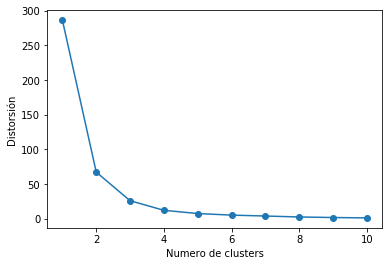

In [5]:
distortions = []

for i in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Distorsión')
plt.show()

In [6]:
clusters = KMeans(n_clusters=4,
                    init='k-means++', 
                    max_iter=300,
                    tol=1e-04,
                    n_init=10,
                    random_state=0)

In [7]:
y_km = clusters.fit_predict(X)
y_km

array([0, 0, 0, ..., 0, 0, 0])

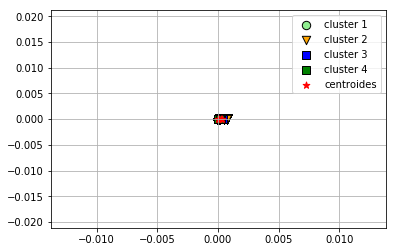

In [8]:
plt.scatter(X[y_km==0,0],
          X[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(X[y_km==1,0],
          X[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(X[y_km==2,0],
          X[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(X[y_km==3,0],
          X[y_km==3,1],
          s=70,
          c='green',
          edgecolor='black',
          marker='s',
          label='cluster 4')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

In [9]:
from sklearn.cluster import Birch

In [10]:
brc = Birch(branching_factor=50, n_clusters=None, threshold=0.5,
compute_labels=True)

In [11]:
brc.fit(X)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
   threshold=0.5)

In [12]:
brc.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

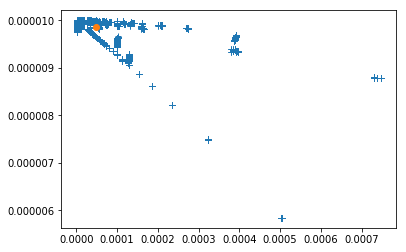

In [13]:
c = brc.subcluster_centers_
plt.plot(X[:,0], X[:,1], '+')
plt.plot(c[:,0], c[:,1], 'o')
plt.show()

# Aplicamos PCA al KMeans

In [14]:
from sklearn import decomposition

In [15]:
pca = decomposition.PCA(n_components=4)
pca.fit(X)
X = pca.transform(X)

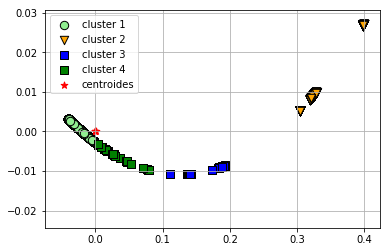

In [16]:
plt.scatter(X[y_km==0,0],
          X[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(X[y_km==1,0],
          X[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(X[y_km==2,0],
          X[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(X[y_km==3,0],
          X[y_km==3,1],
          s=70,
          c='green',
          edgecolor='black',
          marker='s',
          label='cluster 4')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

# Aplicamos PCA al BIRCH

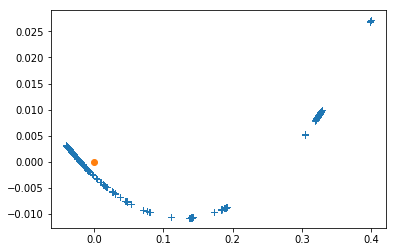

In [17]:
c = brc.subcluster_centers_
plt.plot(X[:,0], X[:,1], '+')
plt.plot(c[:,0], c[:,1], 'o')
plt.show()